# <center> <span style='color:#3c3b5f'>Ejercitación módulo Pandas</span></center>

Módulo Pandas - Parte práctica

**Profesor Adjunto:** Mag. Bioing. Baldezzari Lucas

<p style='text-align: left;'> V2022 </p>

<hr style="border:1px solid gray"> </hr>

## <span style='color:#55aa74'>1. Primeros pasos con Pandas</span>

En este ejercicio trabajará con datos estimados de personas en condición de calle en 2018 en algunos estados de Estados Unidos.

- La columna *individuos* representa personas que viven solas.
- La columna *miembrosFamilia* es el número de personas en condición de calle que poseen hijos/as.
- La columna *poblacionTotal* representa el total de personas que habitan en un estado.

#### 1.1 Cargando un DataFrame y chequeando datos

- A) Usted dispone de un archivo llamado *sinhogares.csv* dentro de la carpeta */datasets*. Cargue el archivo en un dataframe llamado *sinhogares*
- B) Utilice los siguientes métodos para conocer un poco más los datos cargados.
    - .head()
    - .info()
    - .describe()
    - .shape
- C) En base a lo anterior, ¿cuantas observaciones/filas posee el data set?

In [4]:
## TODO 1.1
import pandas as pd
#a
sh = pd.read_csv("datasets/sinhogares.csv")
#b
sh.shape
# sh.info
# sh.head
# sh.describe
#c
#el dataset posee 51 observaciones/filas

(51, 6)

#### 1.2 Valores, columnas e índices del dataframe

Para entender mejor al dataframe investigue los atributos.

- .values
- .columns
- .index

¿Cuales son las columnas que forman el DataFrame? ¿Cómo son los índices (numéricos o tienen nombre)?

In [5]:
## TODO 1.2
# sh.values
sh.columns
# sh.index
#el dataframe tiene 6 columnas, 5 estan tituladas (region,estado...)


Index(['Unnamed: 0', 'region', 'estado', 'individuos', 'miembrosFamilia',
       'poblacionTotal'],
      dtype='object')

#### 1.3 Ordenando el dataframe

- A) Ordene los datos dentro del dataframe *sinhogares* por la columna *individuos* y guardela en un archivo llamado *sinhogares_Ind*. Imprima los primeros 5 datos de *sinhogares_Ind*.
- B) En un dataframe llamado *sinhogares_Fam* guarde el dataframe original pero ordenado por la columna *miembrosFamilia* de mayor a menor. Imprima los primeros 5 datos de *sinhogares_Fam*.
- C) Ordene los datos del dataframe primero por *region* (de forma ascendente) y luego por *miembrosFamilia* (de manera descendente). Guarde los datos en un dataframe e imprima los primeros cinco valores.

In [8]:
## TODO 1.3
#a
sinhogares_Ind = sh.sort_values('individuos').head()
#b
sinhogares_Fam = sh.sort_values('miembrosFamilia', ascending=False).head()
#c
sinhogares_reg_fam = sh.sort_values(['region','miembrosFamilia'], ascending=[True,False]).head


#### 1.4 Obteniendo subsets a partir de columnas

Recuerde que podemos obtener trozos de nuestro dataframe haciendo 

```python
subset1 = dataframe["columnaInteres"]
subset1 = dataframe[["columnaInteres","otraColumna"]]
```

- A partir del dataframe *sinhogares* cree un dataframe llamado *indiv_estados* que este formado por las columnas *individuos* y *poblacionTotal*. Imprima el head del dataframe.

In [10]:
## TODO 1.4
indiv_estados = sh[["individuos", "poblacionTotal"]].head()
indiv_estados

,individuos,poblacionTotal
0,2570,4887681
1,1434,735139
2,7259,7158024
3,2280,3009733
4,109008,39461588


#### 1.5 Obteniendo subsets a partir de filas aplicando filtros

- A) Cree un dataframe que contenga los datos de las personas en condición de calle que superen los 10mil individuos por estado.
- B) Cree un dataframe que contenga los datos de las personas en condición de calle menores a los mil individuos y que correspondan a la región "Pacific". Imprima el dataframe creado.

In [12]:
## TODO 1.5
#A
filtro1=sh["individuos"]>10000
filtro1
#B
filtro2=sh["region"] == "Pacific"
filtro2
subSet2Filtros = sh[ filtro1 & filtro2 ]
subSet2Filtros

,Unnamed: 0,region,estado,individuos,miembrosFamilia,poblacionTotal
4,4,Pacific,California,109008,20964,39461588
37,37,Pacific,Oregon,11139,3337,4181886
47,47,Pacific,Washington,16424,5880,7523869


#### 1.6 Obteniendo subsets a partir de datos categóricos

Utilizando *.isin()* se pide,

- A) Cree un subset que contenga los datos para las regiones *South Atlantic* y *Mid-Atlantic*. Imprima el subset.
- B) Cree un subset que contenga los datos para los estados *California*, *Arizona*, *Nevada* y *Utah*.

In [47]:
## TODO 1.6
dataFilt=sh["region"].isin(["South Atlantic","Mid-Atlantic"])
filtrado=sh[dataFilt]
# dataFilt
dataFilt2=sh["estado"].isin(["California", "Arizona", "Nevada", "Utah"])
filtrado2=sh[dataFilt2]
print(filtrado)

    Unnamed: 0          region                estado  individuos  \
7            7  South Atlantic              Delaware         708   
8            8  South Atlantic  District of Columbia        3770   
9            9  South Atlantic               Florida       21443   
10          10  South Atlantic               Georgia        6943   
20          20  South Atlantic              Maryland        4914   
30          30    Mid-Atlantic            New Jersey        6048   
32          32    Mid-Atlantic              New York       39827   
33          33  South Atlantic        North Carolina        6451   
38          38    Mid-Atlantic          Pennsylvania        8163   
40          40  South Atlantic        South Carolina        3082   
46          46  South Atlantic              Virginia        3928   
48          48  South Atlantic         West Virginia        1021   

    miembrosFamilia  poblacionTotal  
7               374          965479  
8              3134          701547  
9

## <span style='color:#55aa74'>2. Un poco de estadística</span>

Para este ejercicio se trabajará con los datos de venta de la cadena de supermercados *Walmart* que van desde enero de 2010 a diciembre de 2012.

Las columnas dentro del set de datos representa:

- Store: Numero de supermercado
- Type: Tipo de tienda.
- Department: Departamento donde se realizó la venta.
- Date: Semana de venta
- weekly_sales: Ventas semanales
- is_holiday: Indica si esa semana hubieron días festivos.
- Temperature: Temperatura del día de las ventas.
- Fuel_Price: Costo del combustible en la región
- Unemployment: Representa el porcentaje de la fuerza laboral sin trabajo.

Cargamos el archivo *walmart.csv* (se encuentra dentro del directorio */datastes/*) en un dataframe llamado *walmart* y vemos su encabezado

In [40]:
walmart = pd.read_csv("datasets/walmart.csv")
walmart.head(19)

,store,type,department,date,weekly_sales,is_holiday,temperature,fuel_price,unemployment
0,1,A,1,2/5/2010,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,3/5/2010,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,4/2/2010,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,5/7/2010,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,6/4/2010,17558.09,False,27.050000,0.714586,7.808
5,1,A,1,7/2/2010,16333.14,False,27.172222,0.705076,7.787
6,1,A,1,8/6/2010,17508.41,False,30.644444,0.693980,7.787
7,1,D,1,9/3/2010,16241.78,False,27.338889,0.680772,7.787
8,1,A,1,10/1/2010,20094.19,False,22.161111,0.687640,7.838
9,1,A,1,11/5/2010,34238.88,False,14.855556,0.710359,7.838


#### 2.1 Medias y medianas

- A) ¿Cuál es el promedio de ventas semanales totales? ¿Cuál es la mediana?
- B) Obtenga el promedio de ventas semanales para cada año del data set. Idem para la mediana.
- C) ¿Cuando se hizo la última venta según este data set? ¿Y cuando fue la primera?

In [117]:
## TODO 2.1
#a
ventasSemanales=walmart["weekly_sales"]
promedioVentasS=ventasSemanales.mean()
medianaVentasS=ventasSemanales.median()
print("El promedio de ventas semanales es", promedioVentasS, "y la mediana es", medianaVentasS)

#b
walmart['year'] = pd.DatetimeIndex(walmart['date']).year
promedio=walmart[["year","weekly_sales"]].groupby("year").agg(["mean","median"])
promedio

#c
# walmart.date.max

# ventas2010prom=ventas2010.mean
# filtro2010=walmart[(walmart['year'] > '1/1/2010') & (walmart['year'] < '31/12/2010')]

# filtro2010=walmart.query('1/1/2010 < date < 31/12/2010')

# ventas2010=walmart['year'].loc(['2011','2012'])
# ventas2010
# promventas2010=ventas2010.mean
# promventas2010
# ventas2011=ventasanuales.loc['1/1/2011':'31/12/2011']
# ventas2012=ventasanuales.loc['1/1/2012':'31/12/2012']
# ventas2012

# orden=walmart.set_index(["date"]).sort_index()
# ventas2011=
# ventas2012=

El promedio de ventas semanales es 23843.950148505668 y la mediana es 12049.064999999999


weekly_sales          
              mean    median
year                        
2010  24730.871917  12952.56
2011  18074.865543   6674.82
2012    152.593627     14.98

#### 2.2 Rango intercuartil

- Defina una función llamada *iqr(columna)* que devuelva el rango intercuartil (IQR). Esta función recibirá una *columna* de un dataframe con valores numéricos a partir de los cuales obtendrá los cuartiles $Q_1$ y $Q_3$ para devolver el $IQR = Q_3-Q_1$.
- Luego con la función *.agg()* aplique las funciones *iqr()* y *np.median()* a las columnas *temperature*, *fuel_price* y *unemployment* del set de datos. Imprima el dataframe obtenido.

In [9]:
## TODO 2.2
def irq(columna):
    pass

print("walmart[['columnas']].agg([lista de funciones])") ##idea de implementación

walmart[['columnas']].agg([lista de funciones])


#### 2.3 Eliminando duplicados y contando

Utilizando *.drop_duplicates()* se pide:

- A) Elimine los datos duplicados a partir de las columnas *store* y *type*. Almacene el dataframe en *tiposTiendas*.
- B) Elimine los datos duplicados a partir de las columnas *store* y *departament*. Almacene el dataframe en *deptsTiendas*.
- C) Genere un subset llamado *fechaVacaciones* a partir de filtrar los datos en donde los valores de la columna *is_holiday* son True y remueva los duplicados a partir de la columna *date*.

Imprima los dataframe creados.

In [10]:
## TODO 2.3

tiposTiendas = ___
deptsTiendas = ___
fechaVacaciones = ___


#### 2.4 Contando variables categóricas

A partir de los dataframe *tiposTiendas* y *deptsTiendas* se pide,

- A) Cuente cuántos tipos de tiendas hay dentro de *tiposTiendas*. También imprima las proporciones (usando *normalize = True*)
- B) Cuente cuántos departamentos diferentes tenemos en *deptsTiendas* y ordene los datos. También imprima las proporciones ordeandas.


In [11]:
## TODO 2.4

#### 2.5 Proporciones de ventas por cada tipo de tienda

Calcule las proporciones de ventas semanales realizadas por cada tienda. Tenga en cuenta que las proporciones son el resultado de la venta de un tipo de tienda dividida las ventas totales.

Utilizando las herramientas vistas hasta ahora cuente cuantos tipos de tiendas hay en el set de datos. Luego utilice estos tipos para *filtrar* el dataset por cada tipo de tienda y use la función *.sum()* para sumar las ventas semanales del tipo particular de tienda selecionado. Finalmente divida cada una de las ventas semanales por las ventas totales.

Guarde las proporciones en una lista.

Ejemplo para tiendas del tipo A

```python
ventasA = walmart[walmart["type"] == "A"]["weekly_sales"].sum()/totales
```

Donde *totales* es la suma de todas las ventas semanales del set de datos.

In [12]:
## TODO 2.5

### <span style='color:#381c88'>Función *.groupby()*</span>

#### 2.6 Haciendo cálculos con *groupby()*

Implemente el punto 2.5 pero usando la función *groupby()*.

> Much easier! Isn't it?

In [13]:
## TODO 2.6

#### 2.7 Datos a partir de agrupamiento múltiple

- A) Obtenga los mínimos, máximos, las medias (usando np.mean) y las medianas (usando np.median) de las ventas semanales para cada tipo de tienda.
- B) Obtenga los mínimos, máximos, las medias (usando np.mean) y las medianas (usando np.median) de las columnas *unemployment* y *fuel_price* para cada tipo de tienda.

**Hint:** Utilice *.groupby()* para agrupar datos y *.agg()* para aplicar las funciones.

In [14]:
## TODO 2.7

### <span style='color:#381c88'>Tablas dinámicas</span>

En esta parte utilizaremos la función *.pivot_table()*.

#### 2.8 Datos a partir de agrupamiento múltiple

- A) Obtenga la media y la mediana (con funciones de Numpy) de las ventas semanales por cada tipo de tienda usando *.pivot_table()* y almacene la tabla en *mediasYmedianas*.
- B) Use *.pivot_table()* para crear una tabla donde muestre las ventas promedios por cada tipo de tienda, donde las columnas correspondan a *is_holiday*. Guarde esta tabla en *mediasXVacaciones*.

In [121]:
## TODO 2.8
import numpy as np
mediasYmedianas = walmart.pivot_table(values = "weekly_sales", columns = "type", aggfunc=[np.mean,np.median])

mediasXVacaciones = walmart.pivot_table(values = "weekly_sales", columns = "is_holiday", index = "type", aggfunc=[np.mean,np.median])
mediasXVacaciones

mean                median         
is_holiday         False       True      False     True
type                                                   
A           23753.919970  590.04525  11982.065   37.500
B           25751.980533  810.70500  13348.680  810.705
C           37179.641389        NaN  25910.160      NaN
D           17473.291852        NaN  13465.740      NaN

## <span style='color:#55aa74'>3. Temperatura a lo largo de los años</span>

En esta parte trabajará con un set de datos que contiene valores de temperatura para diferentes países a lo largo de varios años. Usted cuenta con un archivo llamado *temperatures.csv* dentro de la carpeta *datasets/*.

In [114]:
t = pd.read_csv("datasets/temperatures.csv")
t

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Costa de Marfil,27.293
1,2000-02-01,Abidjan,Costa de Marfil,27.685
2,2000-03-01,Abidjan,Costa de Marfil,29.061
3,2000-04-01,Abidjan,Costa de Marfil,28.162
4,2000-05-01,Abidjan,Costa de Marfil,27.547
...,...,...,...,...
16402,2013-04-01,Xian,China,12.563
16403,2013-05-01,Xian,China,18.979
16404,2013-06-01,Xian,China,23.522
16405,2013-07-01,Xian,China,25.251


#### 3.1 Datos básicos

Cargue el archivo en un dataframe llamado *temperaturas* y encuentre.

1. Los 5 países con mayores temperaturas promedios en los últimos 5 años.
2. Las 10 ciudades con mayores temperaturas promedios en los últimos 5 años.
3. El país que haya sufrido el mayor aumento de temperatura desde el primer registro hasta el último registro dentro del set de datos. ¿Cuantos grados en promedio ha aumentado o disminuído la temperatura este país?

In [17]:
## TODO 3.1
t

#### 3.2 Subdatos con .loc[ ]

1. Crear una lista llamada *ciudades* que contengan las ciudades de "Montreal" y "Toronto".
2. Utilizando corchetes cree un subset de datos filtrando con la lista creada anteriormente. Nota: Puede ayudarse con *isin()*.
3. Utilice *.set_index()* para crear un nuevo dataframe llamado *tempCity* con los índices a partir de las ciudades. Luego use la función .loc[] para crear un subset de datos que contenga las ciudades en la lista *ciudades*

¿Cual de las formas de crear subsets les parece más facil y/o intuitiva?

In [18]:
## TODO 3.2

#### 3.3 Trabajando con índices multinivel

A partir del dataframe *temperaturas* setee los índices *country* y *city* y asigne el dataframe a *tempCC*. Luego cree una lista de tuplas de tal manera de tener los pares país/ciudad de Brazil/Rio de Janeiro, Canada/Toronto y China/Wuhan. Finalmente, imprima un subset de datos de *tempCC* donde solo se muestren los datos correspondientes a los pares mencionados anteriormente. Utilice .loc[].

In [19]:
## TODO 3.3

tempCC = ___

#### 3.4 Slicing

Ordene el dataframe *tempCC* usando *.sort_index()* luego,

1. Imprima un slice contemplando los países de Brasil hasta Dominican Republic.
2. Imprimia un slice contemplando las ciudades de Belo Horizonte hasta Bogotá.
3. Cree un dataframe llamado *tempsDates* el cual reciba el dataframe *temperaturas* pero con la columna *date* seteada como índice. Ordene *tempsDates* por índice. Luego imprima un slice que contemple las fechas 2010-07 y 2011-01.

In [20]:
## TODO 3.4

#### 3.5 Tabla dinámica por ciudad y año

Ahora creará una tabla dinámica para obtener información de la variación de temperatura por cada ciudad dentro del set de datos.

1. En primer lugar, agregue una columna llamada *year* al set *temperaturas* que contenga los años a partir de la columna *date* del dataframe. Es posible obtener los días, los mesos o los años de un dato del tipo *fecha* haciendo

```python
dataframe["columa"].dt.component
```

Así por ejemplo, tomando el dataframe *temperaturas* podríamos agregar una columna *year* haciendo,

```python
temperaturas["year"] = temperaturas["date"].dt.year
```

**IMPORTANTE**: Si al intentar hacer lo anterior usted recibe un error del tipo 

```python
AttributeError: Can only use .dt accessor with datetimelike values
```

Debe ejecutar la siguiente linea de código para formatear las fechas.

```python
t['date'] = pd.to_datetime(t.date, format='%Y-%m-%d')
```

2. Cree una tabla pivote que tome los valores de *avg_temp_c*, donde los índices estén formados por *country* y *city* (en ese orden) y las columnas contengan los años de la columna *year* agregada en el paso anterior. Guarde la tabla en *tablaTemps*. Imprima *tablaTemps*.

In [21]:
## TODO 3.5
tablaTemps = ___

#### 3.6 Variación de temperatura para la ciudad de Wuhan, China.

A continuación veremos la variación de temperatura promedio desde el año 2000 al 2013 para la ciudad de Wuhan. Una forma de hacer esto es siguiendo estos pasos.

- Utiliando el dataframe *temperaturas* con la columna *year* agregada, primeramente filtre con [] los datos correspondientes a *China*. Luego cree una *pivote_table()* donde sus valores estén formados por los datos de las columnas *avg_temp_c*, los índices correspondan a la columna *city* y las columnas correspondan a *year*.
- Imprima la tabla. Si todo esta OK, Lla misma debe contener las temperaturas promedios de las ciudades de China que figuren en el dataset desde el año 2000 al año 2013. Guarde esta tabla en *tempsChinaCities*.
- Utilizando *tempsChinaCities.loc[]* obtenga las variaciones de temperatura correspondientes a la ciudad de *Wuhan*. Guarde estos datos en *WuhanTemps*.
- Finalmente, descomente las lineas para graficar.

In [22]:
## TODO 3.6
tempsChinaCities = ___
WuhanTemps = ___

In [23]:
## # Descomentar para graficar
# import matplotlib.pyplot as plt

# plt.plot(WuhanTemps, label = "Wuhan")
# plt.xlabel("Año")
# plt.ylabel("Temperatura [°C]")
# plt.title("Temperaturas promedios desde 2000 a 2013")
# plt.legend()
# plt.show()

## <span style='color:#55aa74'>4. Graficación básica</span>

En este ejercicio se trabajará con un set de datos que contiene las ventas semanales de *paltas* en tiendas de EEUU. Estas ventas están separadas por año, por tipo (convencional u orgnánico) y por tamaño (small, large, extra_large).

Cargue los datos de *paltas.csv* que se encuentra dentro de *datasets/*. Imvestigue el dataframe con los métodos vistos.

#### 4.1 Paltas populares

- Obtenga el número total de paltas vendidas por cada tamaño (*size*). Puede usar *.groupby()* para agrupar por tamaño y luego computar las ventas semanales totales. Guarde estos datos en *ventasXSize*.
- Utilice *ventasXSize* para realizar un gráfico de barras.

In [24]:
## TODO 4.1 
ventasXSize = ___

## gráfica
# ventasXSize.plot(kind = "bar")
# plt.show()

#### 4.2 Ventas a lo largo del tiempo

- Compute el número de paltas vendidas por fecha. Guarde los datos en *ventasXFecha*.
- Realice un gráfico de *línea* a partir de *ventasXFecha*.

In [25]:
## TODO 4.2

ventasXFecha = ___

##gráfica
pass

#### 4.3 Ventas vs Precio

Realice un gráfico del tipo *scatter* en donde el eje x tenga los datos de la columna *nb_sold* y el eje y tenga los datos de la columna *avg_price*. Agregue un título al gráfico.

#### 4.3 Convencional vs Orgánico

Realice un histograma donde contabilicen las ventas semanales de paltas orgánicas y otro en donde contabilicen las ventas semanales de paltas convenionales. Coloque ambos histogramas en el mismo gráfico.

## <span style='color:#55aa74'>5. Analizando jugadores FIFA 2021 (obligatorio)</span>

Para este ejercicio se utilizará el set de datos del juego FIFA 2021. El mismo contiene información acerca de los jugadores de fútbol de diferentes ligas y selecciones a nivel mundial.

El archivo con el cual trabajará se llama  *fifa2021.csv*.

Antes de empezar, realizaremos una limpieza de los datos.

In [5]:
fifa21 = pd.read_csv("datasets/fifa2021.csv")
fifa21.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,6/24/1987,170,72,Argentina,FC Barcelona,...,NaN,35,24,6,11,15,14,8,89+3,89+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,2/5/1985,187,83,Portugal,Juventus,...,NaN,32,24,7,11,15,14,11,91+1,91+1
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,12,18,87,92,78,90,90,33+3,33+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,8/21/1988,184,80,Poland,FC Bayern München,...,NaN,42,19,15,6,12,8,10,89+2,89+2
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,NaN,30,29,9,9,15,15,11,84+3,84+3


In [6]:
## Cantidad de datos
print(fifa21.shape)

(18944, 82)


In [7]:
## Eliminamos algunas columnas con drop()
fifa21 = fifa21.drop(["sofifa_id","player_url","long_name","dob","team_jersey_number","ls","st"], axis=1)
fifa21.shape

(18944, 75)

In [8]:
## Chequeamos si tenemos columnas con valores NaN (al menos uno)
print(fifa21.columns[fifa21.isna().any()])

Index(['club_name', 'league_name', 'league_rank', 'release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking'],
      dtype='object')


Vemos que varias columnas tienen al menos un valor NaN. Por simplicidad vamos a quitar dichas columnas.

In [9]:
fifa21 = fifa21.drop(['league_rank', 'release_clause_eur',
       'player_tags', 'team_position', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'defending_marking','real_face'], axis = 1)

In [31]:
fifa21.shape
fifa21

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,...,90,92,93,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,Colombia,América de Cali,Colombian Liga Postobón,47,52,40000,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,47,52,35000,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,China PR,Tianjin TEDA FC,Chinese Super League,47,51,35000,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,47,51,40000,...,45,42,43,49,45,15,7,7,5,13


Ahora vamos a chequear si tenemos algún valor Nan dentro del DataFrame.

In [32]:
fifa21.isna().any().any()

True

Vemos que *fifa21.isna().any().any()* nos arroja *True*, indicando que tenemos valores NaN.

Cuando hacemos

```python
fifa21.isna().any().any()
```

Estamos evaluando si algún valor dentro del objeto *Series* de pandas devuelto al hacer *fifa21.isna().any()* tiene algún valor True. Como al menos un valor dentro del objeto *Series* posee un valor True, *fifa21.isna().any().any()* nos arroja True.

In [33]:
## Nos quedamos con aquellos datos que tienen nombres de club que no sean NA
fifa21 = fifa21[fifa21["club_name"].notna()]

## Nos quedamos con aquellos datos que tienen nombres de liga que no sean NA
fifa21 = fifa21[fifa21["league_name"].notna()]

In [34]:
## El resto lo llenamos de cero
fifa21 = fifa21.fillna(0)

¿Estamos seguros que hemos sacado todos los valores NaN?

In [35]:
fifa21.isnull().values.any()

False

Por lo que podemos ver, ¡sí!

##### <span style='color:#5DADE2'>Chequeando valores *Null*</span>

Podríamos tener valores *Null* dentro del dataframe. Pandas ofrece un método para chequear la presencia de este tipo de valores, el mismo es *.isnull()*.

Veamos si tenemos datos null.

In [36]:
fifa21.isnull().values.any()

False

Por lo que podemos ver, no tenemos valores *null* dentro de nuestro set de datos.

Ahora podemos empezar a trabajar con el dataframe.

Empecemos...

In [37]:
print(f"Cantidad de filas/observaciones {fifa21.shape[0]}")
print(f"Cantidad de variables/columnas {fifa21.shape[1]}")

Cantidad de filas/observaciones 18719
Cantidad de variables/columnas 51


##### <span style='color:#5DADE2'>¿Cuantos y qué paises tenemos en el set de datos?</span>

Podríamos usar [*pandas.unique(values)*](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) para determinar los jugadores por países de la siguiente manera.

In [38]:
print(f"Cantidad de países en el set {len(fifa21['nationality'].unique())}")
fifa21['nationality'].unique()

Cantidad de países en el set 161


array(['Argentina', 'Portugal', 'Slovenia', 'Poland', 'Brazil', 'Belgium',
       'France', 'Germany', 'Netherlands', 'Senegal', 'Egypt', 'Spain',
       'England', 'Scotland', 'Italy', 'Uruguay', 'Croatia', 'Gabon',
       'Costa Rica', 'Korea Republic', 'Switzerland', 'Serbia',
       'Slovakia', 'Morocco', 'Bosnia Herzegovina', 'Hungary', 'Denmark',
       'Algeria', 'Norway', 'Cameroon', 'Nigeria', 'Ghana', 'Mexico',
       'Austria', 'Albania', 'Greece', 'Sweden', 'Wales', 'Chile',
       'Finland', 'Ivory Coast', 'Colombia', 'Togo', 'Czech Republic',
       'Russia', 'Canada', 'United States', 'Guinea', 'Montenegro',
       'Venezuela', 'Ukraine', 'Republic of Ireland', 'Israel', 'Jamaica',
       'Turkey', 'Australia', 'Northern Ireland', 'China PR', 'Armenia',
       'DR Congo', 'Ecuador', 'Kosovo', 'North Macedonia',
       'Central African Republic', 'Iceland', 'Peru', 'Mali',
       'Burkina Faso', 'Paraguay', 'Romania', 'New Zealand', 'Japan',
       'Cape Verde', 'Tunisia'

### <span style='color:#EC7063'>Ejercicios para punto 5</span>

A partir de acá usted debe resolver lo que se pide.

##### 5.1 Jugadores de Uruguay y Argentina

¿Qué y cuántos jugadores de Uruguay tenemos en el set de datos? ¿Cuales y cuantos de Argen tina?

Podemos responder a la pregunta aplicando lo que hemos visto. A continuación se muestra un ejemplo para obtener los jugadores de Uruguay. Repita para Argentina (y otros países si quisiera).

In [39]:
jugadoresUruguay = fifa21[fifa21["nationality"] == "Uruguay"].drop_duplicates(subset = "short_name")["short_name"].sort_values()
print(f"Cantidad de jugadores de Uruguay en el set de datos {jugadoresUruguay.shape[0]}")
print()
print("Lista")
print(jugadoresUruguay)

Cantidad de jugadores de Uruguay en el set de datos 311

Lista
10163         A. Ale
18260      A. Alfaro
7255      A. Argachá
17428     A. Barboza
9672     A. Canobbio
            ...     
18088    T. Galletto
6424       T. Vecino
6194      W. Camacho
2818      W. Gargano
7581     Y. Calleros
Name: short_name, Length: 311, dtype: object


In [17]:
## 5.1
jugadoresArgentina = fifa21[fifa21["nationality"] == "Argentina"].drop_duplicates(subset = "short_name")["short_name"].sort_values()
print(f"Cantidad de jugadores de Argentina en el set de datos {jugadoresArgentina.shape[0]}")
print()
print("Lista")
print(jugadoresArgentina)
print("y falta el diegote")

Cantidad de jugadores de Argentina en el set de datos 898

Lista
2236       A. Aguerre
16751      A. Aguirre
12067         A. Aleo
7362      A. Almendra
9696       A. Antilef
             ...     
1772     W. Caballero
2997       W. Montoya
15455        W. Ortíz
3392          Y. Asad
15529       Y. Juárez
Name: short_name, Length: 898, dtype: object
y falta el diegote


##### 5.2 Un poco de análisis sobre jugadores uruguayos

1. ¿Cuales son las ligas donde juegan los jugadores de nacionalidad uruguaya según el set de datos?
2. ¿Cuál es la liga con mayor cantidad de jugadores uruguayos? ¿Qué valor tiene? ¿Cuál es la segunda liga con mayor presencia de jugadores uruguayos?
3. ¿Cuantos jugadores uruguayos juegan en la liga *Spain Primera Division*? ¿Quienes son?
4. Tomando solo la liga *Spain Primera Division*, ¿cuál es la proporción de jugadores uruguayos? Es decir, cuantos jugadores de nacionalidad uruguaya juegan en la *Spain Primera Division* respecto de todos los que juegan en la *Spain Primera Division*. Reporte un valor porcentual $\%$
5. ¿Cuales son los porcentajes de jugadores uruguayos de *pie derecho* y *pie izquierdo*?
6. Realice un histograma con las edades de los jugadores uruguayos dentro del dataset.
7. ¿Cuál es el jugador más caro? ¿Cuál el más barato?

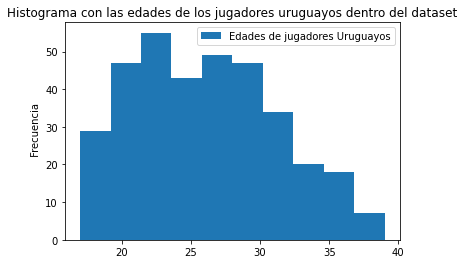

,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,overall,potential,value_eur,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
494,J. Serendero,32,190,85,Uruguay,NaN,NaN,80,80,0,...,71,14,67,17,13,78,81,77,80,77
495,J. Frendado,36,181,82,Uruguay,NaN,NaN,80,80,0,...,50,62,70,82,82,14,15,15,17,19
496,M. Baldona,36,177,75,Uruguay,NaN,NaN,80,80,0,...,73,61,68,81,77,9,9,14,15,8
497,S. Ardero,32,171,63,Uruguay,NaN,NaN,80,80,0,...,80,74,77,13,23,9,7,8,14,10
498,L. Dálves,28,188,83,Uruguay,NaN,NaN,80,80,0,...,58,77,79,27,24,8,11,20,19,20
499,M. Nérez,32,178,69,Uruguay,NaN,NaN,80,80,0,...,75,61,82,77,76,16,15,15,7,7
500,E. Schetino,28,185,80,Uruguay,NaN,NaN,80,80,0,...,42,56,71,83,76,16,12,13,12,17
501,J. Sildero,28,177,75,Uruguay,NaN,NaN,80,80,0,...,83,77,81,35,33,12,12,13,15,13
679,E. Guichón,32,168,65,Uruguay,NaN,NaN,79,79,0,...,68,49,76,77,76,13,13,16,8,9
680,R. Di Leonardo,24,177,75,Uruguay,NaN,NaN,79,79,0,...,61,41,54,77,76,15,13,14,14,18


In [10]:
#5.2.1
jugadoresUruguayPorLiga= fifa21[fifa21["nationality"] == "Uruguay"].drop_duplicates(subset = ["short_name","league_name"], keep='last')
jugadoresUruguayPorLiga[["short_name","league_name"]].sort_values("league_name")#Juagdores y ligas 

#5.2.2
cantidadJugadoresPorLiga=jugadoresUruguayPorLiga[["short_name","league_name"]].sort_values("league_name")#Juagdores y ligas 
juagdoreUYporLiga=cantidadJugadoresPorLiga["league_name"].value_counts().sort_values(ascending=False)
juagdoreUYporLiga[0:1]#Primer liga con mayor presencia de uruguayos
juagdoreUYporLiga[1:2]#Segunda liga con mayor presencia de uruguayos

#5.2.3
uruguayosLigaEsp = juagdoreUYporLiga["Spain Primera Division"] #Jugadores uruguayos en la primera division de España

#5.2.4
totalLigaEspañola=fifa21[fifa21["league_name"] == "Spain Primera Division"].shape

proporcionUYLigaEsp=round((uruguayosLigaEsp/totalLigaEspañola[0])*100,1) #Porcentaje de jugadores Uruguayos en primera division Española
proporcionUYLigaEsp

#5.2.5

jugadoresUYDiestro= fifa21[(fifa21["nationality"] == "Uruguay") & (fifa21["preferred_foot"]== "Right")]["short_name"] #jugadores derechos 
jugadoresUYZiniestro= fifa21[(fifa21["nationality"] == "Uruguay") & (fifa21["preferred_foot"]== "Left")]["short_name"] #jugadores izquierdos

#5.2.6

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
jugadoresUYedad= fifa21[fifa21["nationality"] == "Uruguay"]["age"]
ax.hist(jugadoresUYedad, label = "Edades de jugadores Uruguayos")
ax.set_ylabel(" Frecuencia")
ax.set_title("Histograma con las edades de los jugadores uruguayos dentro del dataset")
plt.legend()
plt.show()

#5.2.7

jugadorUYMasCaro= fifa21[fifa21["nationality"] == "Uruguay"]["value_eur"].max()
fifa21[(fifa21["nationality"] == "Uruguay") & (fifa21["value_eur"] == jugadorUYMasCaro)] #Jugador uruguayo mas caro

jugadorUYMasBarato= fifa21[fifa21["nationality"] == "Uruguay"]["value_eur"].min()
fifa21[(fifa21["nationality"] == "Uruguay") & (fifa21["value_eur"] == jugadorUYMasBarato)] #Jugador uruguayo mas barato

##### 5.3 Top 20 países con mayores jugadores

Realice un gráfico de barras horizontal (*kind = 'barh'*) donde se muestre la cantidad de jugadores de los 20 países con mayores cantidades de jugadores.

<AxesSubplot:>

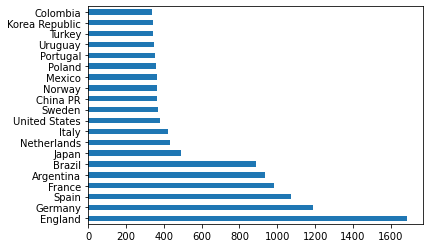

In [11]:
## 5.3
top20 = fifa21["nationality"].value_counts()
muestra = top20[:20].copy()
muestra.plot.barh()

##### 5.4 Puntaje total (*overall*) vs potencial (*potential*)

El set de datos cuenta con las columnas llamadas *overall* y *potential*. El *overall* es un puntaje que va de 0 a 100 y representa la media ponderada de todas las habilidades (ej. *skill_dribbling*, *movement_sprint_speed*, etc) para un cierto jugador. Por otro lado, el *potential* o *potencial* es una estimación de si el jugador puede dar más en un futuro.

Por ejemplo,

In [12]:
filtromessi = fifa21["short_name"] == "L. Messi"
filtrombappe = fifa21["short_name"] == "K. Mbappé"
fifa21[filtromessi | filtrombappe][["short_name","overall","potential"]].set_index("short_name")

,overall,potential
short_name,,
L. Messi,93,93
K. Mbappé,90,95


Podemos ver del dataframe anterior que Messi esta dando todo lo que puede dar, mientras que Mbappe aún podría dar un poco más según las estimaciones del FIFA.

Se le pide que grafique un histograma considerando el dataframe completo donde se pueda ver la frecuencia para *overall* y para *potential*.

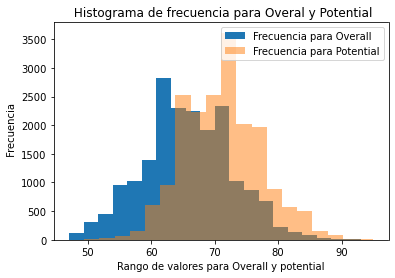

In [13]:
#5.4
fig, ax = plt.subplots()
ax.hist(fifa21["overall"], label = "Frecuencia para Overall", bins = 20)
ax.hist(fifa21["potential"], label = "Frecuencia para Potential", alpha = 0.5, bins = 20)
ax.set_xlabel("Rango de valores para Overall y potential")
ax.set_ylabel(" Frecuencia")
ax.set_title(" Histograma de frecuencia para Overal y Potential")
plt.legend()
plt.show()

##### 5.5  Analizando datos por posiciones

Si se observa la columna *player_positions* del set de datos podemos ver en qué posiciones juega cierto jugador.

En base al juego, las posiciones pueden resumirse en:

- 'ST','CF','RW','LW' = Atacante
- 'LM','RM','CM','CDM','CAM', "RWB" = Mediocampista
- 'LB','RB','CB', 'LWB' = Defensor
- 'GK' = Arquero

Ejemplo

In [45]:
fifa21[["player_positions","short_name"]].set_index("short_name").head()

,player_positions
short_name,
L. Messi,"RW, ST, CF"
Cristiano Ronaldo,"ST, LW"
J. Oblak,GK
R. Lewandowski,ST
Neymar Jr,"LW, CAM"


##### Resuelva

1. Recorra la columna *player_positions* del dataframe y genere una nueva columna llamada *onePosition* donde cada posición tenga los valores Atacante, Mediocampista, Defensor o Arquero, según corresponda. Puede utilizar un *for* para recorrer los datos de la columna. Hay jugadores que juegan en más de una posición, por ejemplo Cristiano Ronaldo, en esos casos reemplace con la primer ocurrencia, en el ejemplo de CR7 su posición sería reemplazada por *Atacante* ya que *ST* es la primer ocurrencia. Una vez agregada la columna *onePosition*, elimine la columna *player_positions*
2. Genere un gráfico de barras donde se muestre la cantidad de jugadores por cada posición del total del dataframe.
3. Repita el punto 3 pero solamente para jugadores de nacionalidad uruguaya.
4. ¿Cual es el promedio de costos por posición de los jugadores de nacionalidad uruguaya?

In [19]:
## 5.5
positionsList = []
for i in list(fifa21["player_positions"].values):
    if player_positions==('RW','LW', 'ST', 'CF',):
        positionsList.append("Atacante")
fifa21['player_positions'] = positionsList
positionsList
#no se logro implementar

NameError: name 'player_positions' is not defined

#### 5.6 TOP 10

1. Genere un nuevo subset con los datos filtrado por la columna *position* para *Atacante*. Sólo tome os primeros 10 valores. El nuevo subset debe tener las columnas *[short_name, nationality, club_name, height_cm, position,	value_eur, overall, potential]*. Ordenarlo por overall y potential (en ese orden) de manera ascendente (ambos). Realizar un set_index() por *short_name*.
2. Repita el punto 1 para formar subsets para las posiciones *Mediocampista*, *Defensor* y *Arquero.

In [47]:
## TODO 5.6